<a href="https://colab.research.google.com/github/ShahadAliAldawsari/ML_Portfolio/blob/ML_bootCamp_project_5/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [11]:
 !pip install scikit-plot

In [12]:
!pip install wordcloud

In [13]:
!pip install transformers

In [144]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
from transformers import AutoTokenizer
from official.nlp import optimization

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [145]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [146]:
strategy = tf.distribute.TPUStrategy(resolver)

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df=pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

[Text(0, 0, '4172'), Text(0, 0, '19314')]

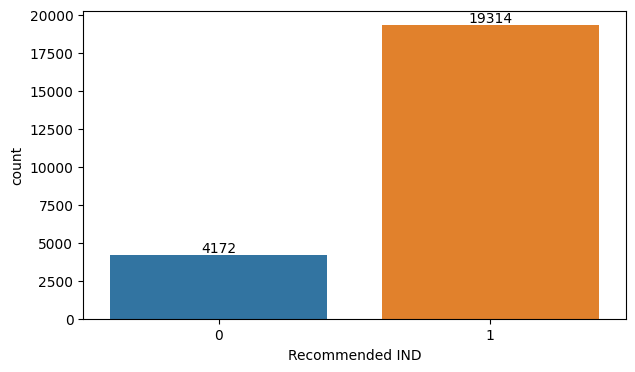

In [18]:
ax=sns.countplot(data=df, x="Recommended IND")
ax.bar_label(ax.containers[0])

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection

In [19]:
df_copy=df.copy()

In [20]:
df_copy = df_copy[["Review Text", "Recommended IND"]]
df_copy.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [21]:
df_copy.isnull().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [22]:
df_copy.duplicated().sum()

850

In [23]:
df_copy.dropna(inplace=True)
df_copy.drop_duplicates(inplace=True)

df_copy.reset_index(drop=True, inplace=True)
df_copy

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22629,I was very happy to snag this dress at such a ...,1
22630,"It reminds me of maternity clothes. soft, stre...",1
22631,"This fit well, but the top was very see throug...",0
22632,I bought this dress for a wedding i have this ...,1


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [24]:
stopwords = set(stopwords.words('english'))
exceptions = {"no", "not"}


In [25]:
stopwords.difference_update(exceptions)

In [26]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stopwords]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #9. joining
    return " ".join( text_cleaned)

In [27]:
df_copy['Review Text'] = df_copy['Review Text'].apply(cleaning)

In [28]:
df_copy

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
...,...,...
22629,happy snag dress great price easy slip flatter...,1
22630,reminds maternity clothes soft stretchy shiny ...,1
22631,fit well top see never would worked im glad ab...,0
22632,bought dress wedding summer cute unfortunately...,1


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [29]:
df_copy_groubed = df_copy.groupby("Recommended IND")
df_copy_groubed.first()

,Review Text
Recommended IND,
0,high hope dress really wanted work initially o...
1,absolutely wonderful silky sexy comfortable


In [30]:
positiv_tweets = df_copy_groubed.get_group(1)


In [31]:
negative_tweets = df_copy_groubed.get_group(0)


### Collect Words (positive and negative separately)

In [32]:
positive_words = " ".join(positiv_tweets['Review Text'])
positive_words[:50]

'absolutely wonderful silky sexy comfortable love d'

In [33]:
negative_words = " ".join(negative_tweets['Review Text'])
negative_words[:50]

'high hope dress really wanted work initially order'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [34]:
worldcloud = WordCloud(background_color="white", max_words =500)

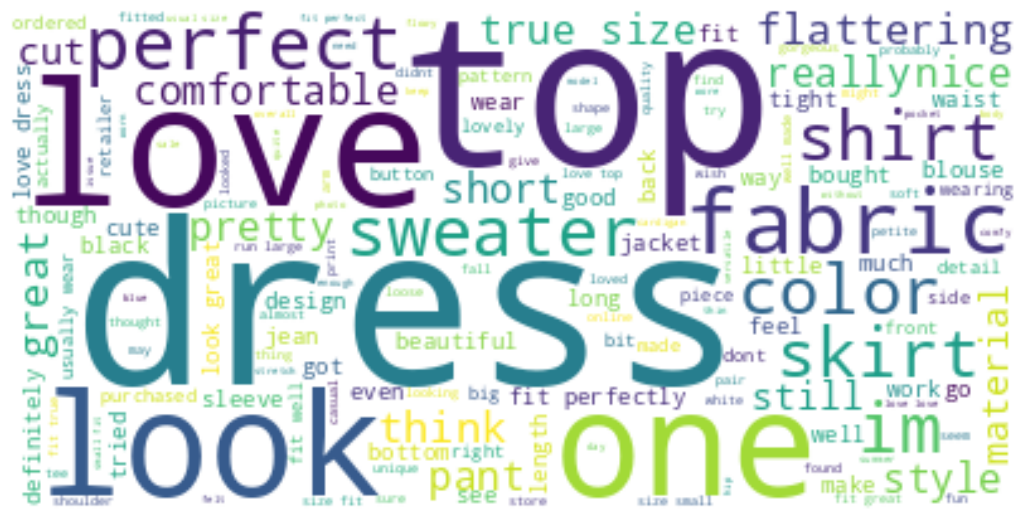

In [35]:
worldcloud.generate(positive_words)

import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# negative_worldcloud = WordCloud(background_color="white", max_words =250)


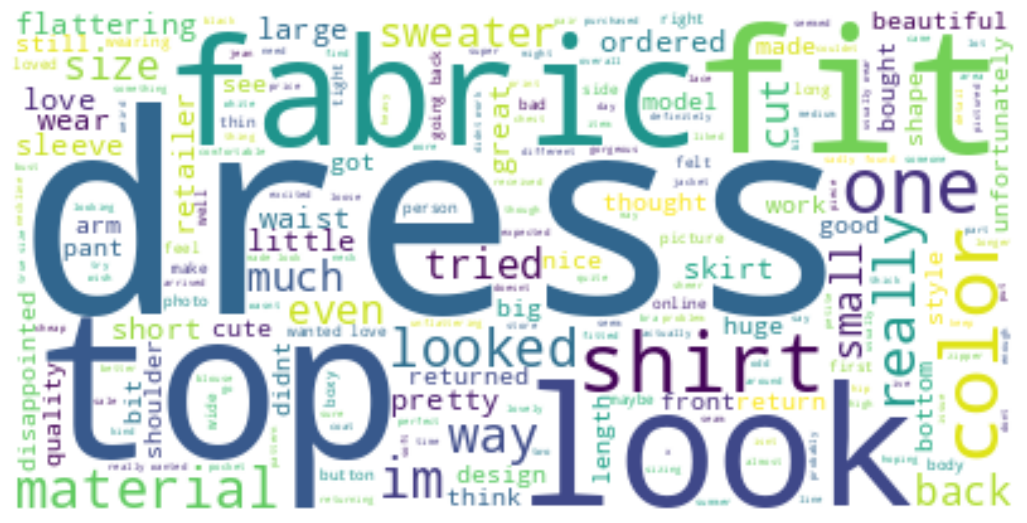

In [36]:
worldcloud.generate(negative_words)

import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [37]:
x = df_copy["Review Text"]
y = df_copy["Recommended IND"]
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.35, shuffle=True, stratify=y, random_state=42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [38]:
count_vectorizer = CountVectorizer(preprocessor=cleaning, max_df=3)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

pd.DataFrame(X_train_count.toarray(), columns = count_vectorizer.get_feature_names_out())

,aa,aaaaaaamazing,aaaahs,aaahed,aame,ab,abbey,abby,abdominal,abhor,abject,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,absence,abso,absolutley,absolutly,absoluty,absurd,absurdly,...,yiddish,yield,yielded,yippee,yogi,yogini,yolk,yoself,yr,yuck,yucky,yuk,yumi,yup,zag,zara,zed,zermatt,zig,zigzag,zigzagging,zillion,zipepr,zippie,zombie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [39]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=cleaning, max_df=3)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

pd.DataFrame(X_train_count.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

,aa,aaaaaaamazing,aaaahs,aaahed,aame,ab,abbey,abby,abdominal,abhor,abject,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,absence,abso,absolutley,absolutly,absoluty,absurd,absurdly,...,yiddish,yield,yielded,yippee,yogi,yogini,yolk,yoself,yr,yuck,yucky,yuk,yumi,yup,zag,zara,zed,zermatt,zig,zigzag,zigzagging,zillion,zipepr,zippie,zombie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Eval Function

In [40]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))


## Naive Bayes


In [41]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [42]:
eval(naive_bayes, X_train_tfidf, X_test_tfidf)

[[  14 1421]
 [  10 6477]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.01      0.02      1435
           1       0.82      1.00      0.90      6487

    accuracy                           0.82      7922
   macro avg       0.70      0.50      0.46      7922
weighted avg       0.78      0.82      0.74      7922

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.05      0.09      2665
           1       0.83      1.00      0.90     12047

    accuracy                           0.83     14712
   macro avg       0.91      0.52      0.50     14712
weighted avg       0.86      0.83      0.76     14712



In [43]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["0"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["0"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["0"])}

naive_bayes = MultinomialNB()
scores = cross_validate(naive_bayes, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.818991
train_accuracy         0.826612
test_precision-neg     0.300000
train_precision-neg    1.000000
test_recall-neg        0.001873
train_recall-neg       0.042818
test_f1-neg            0.003720
train_f1-neg           0.082108
dtype: float64

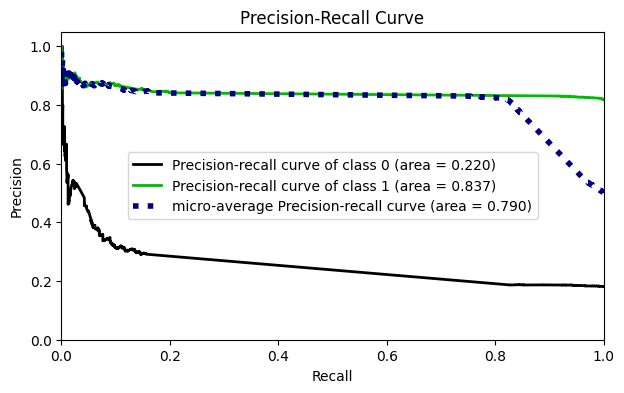

In [44]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

y_pred_proba = naive_bayes.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [45]:
y_pred = naive_bayes.predict(X_test_tfidf)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["0"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["0"], average = None)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

average_precision_score(y_test, y_pred_proba[:, 0])

0.7991695489165318

## Logistic Regression

In [46]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

In [47]:
eval(logistic_regression, X_train_tfidf, X_test_tfidf)

[[ 211 1224]
 [ 513 5974]]
Test_Set
              precision    recall  f1-score   support

           0       0.29      0.15      0.20      1435
           1       0.83      0.92      0.87      6487

    accuracy                           0.78      7922
   macro avg       0.56      0.53      0.53      7922
weighted avg       0.73      0.78      0.75      7922

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.41      0.53      2665
           1       0.88      0.97      0.92     12047

    accuracy                           0.87     14712
   macro avg       0.81      0.69      0.72     14712
weighted avg       0.85      0.87      0.85     14712



In [48]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["0"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["0"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["0"])}

scores = cross_validate(logistic_regression, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.797377
train_accuracy         0.867954
test_precision-neg     0.328620
train_precision-neg    0.746092
test_recall-neg        0.111816
train_recall-neg       0.410882
test_f1-neg            0.166591
train_f1-neg           0.529920
dtype: float64

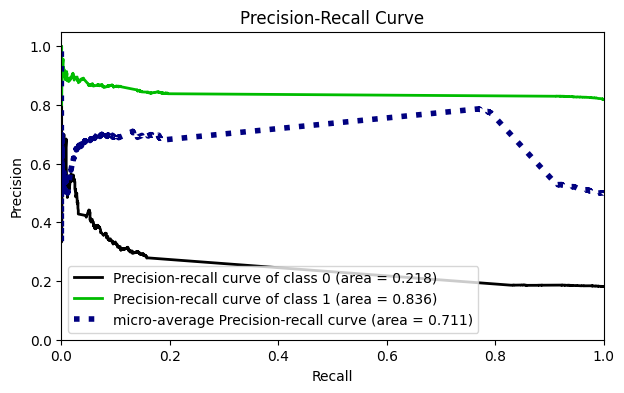

In [49]:
y_pred_proba = logistic_regression.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [50]:
y_pred = logistic_regression.predict(X_test_tfidf)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["0"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["0"], average = None)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

average_precision_score(y_test, y_pred_proba[:, 0])

0.7993762999003278

## Support Vector Machine (SVM)


In [51]:
svm = SVC(class_weight='balanced', probability=True)
svm.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', probability=True)

In [52]:
eval(svm, X_train_tfidf, X_test_tfidf)

[[  76 1359]
 [ 143 6344]]
Test_Set
              precision    recall  f1-score   support

           0       0.35      0.05      0.09      1435
           1       0.82      0.98      0.89      6487

    accuracy                           0.81      7922
   macro avg       0.59      0.52      0.49      7922
weighted avg       0.74      0.81      0.75      7922

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.41      0.56      2665
           1       0.88      0.99      0.93     12047

    accuracy                           0.88     14712
   macro avg       0.89      0.70      0.75     14712
weighted avg       0.88      0.88      0.87     14712



In [53]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["0"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["0"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["0"])}

scores = cross_validate(svm, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.814506
train_accuracy         0.884939
test_precision-neg     0.332182
train_precision-neg    0.899195
test_recall-neg        0.024007
train_recall-neg       0.410882
test_f1-neg            0.044378
train_f1-neg           0.564025
dtype: float64

In [54]:
y_test.shape

(7922,)

In [55]:
y_pred_proba.shape

(7922, 2)

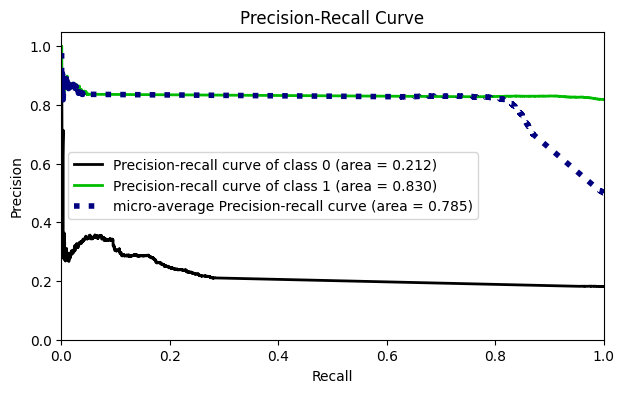

In [56]:
y_pred_proba = svm.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [57]:
y_pred = svm.predict(X_test_tfidf)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["0"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["0"], average = None)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

average_precision_score(y_test, y_pred_proba[:, 0])

0.7979860020555967

## Random Forest


In [58]:
random_forest = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight='balanced')
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [59]:
eval(random_forest, X_train_tfidf, X_test_tfidf)

[[ 107 1328]
 [ 222 6265]]
Test_Set
              precision    recall  f1-score   support

           0       0.33      0.07      0.12      1435
           1       0.83      0.97      0.89      6487

    accuracy                           0.80      7922
   macro avg       0.58      0.52      0.51      7922
weighted avg       0.73      0.80      0.75      7922

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.25      0.40      2665
           1       0.86      0.99      0.92     12047

    accuracy                           0.86     14712
   macro avg       0.89      0.62      0.66     14712
weighted avg       0.87      0.86      0.83     14712



In [60]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["0"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["0"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["0"])}

scores = cross_validate(random_forest, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.814642
train_accuracy         0.858558
test_precision-neg     0.377276
train_precision-neg    0.939255
test_recall-neg        0.036011
train_recall-neg       0.234441
test_f1-neg            0.065269
train_f1-neg           0.374813
dtype: float64

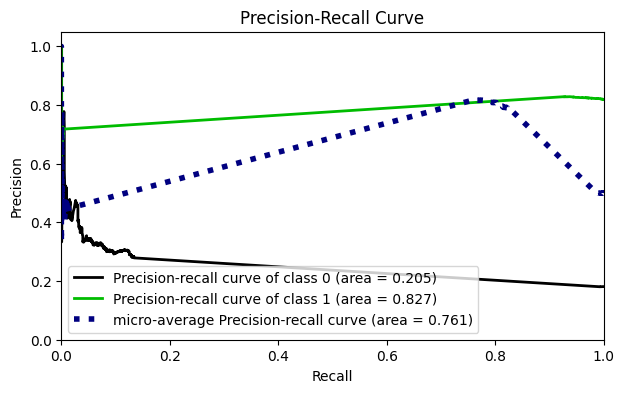

In [61]:
y_pred_proba = random_forest.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [62]:
y_pred = random_forest.predict(X_test_tfidf)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["0"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["0"], average = None)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

average_precision_score(y_test, y_pred_proba[:, 0])

0.8076243385775411

## Ada Boosting


In [63]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state = 42)
ada_boost.fit(X_train_tfidf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [64]:
eval(ada_boost, X_train_tfidf, X_test_tfidf)

[[  42 1393]
 [  57 6430]]
Test_Set
              precision    recall  f1-score   support

           0       0.42      0.03      0.05      1435
           1       0.82      0.99      0.90      6487

    accuracy                           0.82      7922
   macro avg       0.62      0.51      0.48      7922
weighted avg       0.75      0.82      0.75      7922

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.08      0.16      2665
           1       0.83      1.00      0.91     12047

    accuracy                           0.83     14712
   macro avg       0.92      0.54      0.53     14712
weighted avg       0.86      0.83      0.77     14712



In [65]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["0"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["0"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["0"])}

scores = cross_validate(ada_boost, X_train_tfidf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.819263
train_accuracy         0.835116
test_precision-neg     0.530385
train_precision-neg    0.987154
test_recall-neg        0.019131
train_recall-neg       0.090973
test_f1-neg            0.036819
train_f1-neg           0.166588
dtype: float64

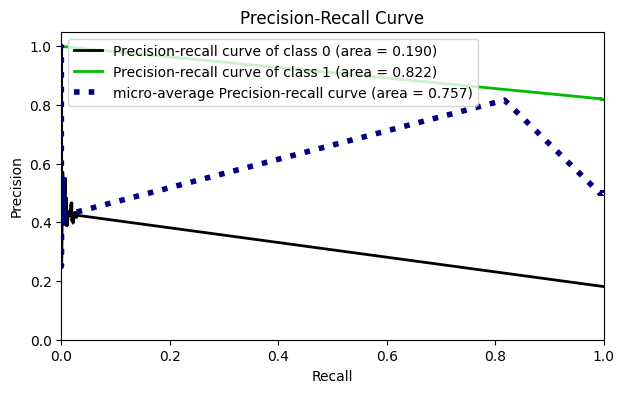

In [66]:
y_pred_proba = ada_boost.predict_proba(X_test_tfidf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [67]:
y_pred = ada_boost.predict(X_test_tfidf)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["0"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["0"], average = None)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

average_precision_score(y_test, y_pred_proba[:, 0])

0.8166943914905399

## DL modeling

### Tokenization

In [68]:
num_words = 25000
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(x)

In [69]:
len(tokenizer.word_index)

11994

### Creating word index

### Converting tokens to numeric

In [70]:
X_num_tokens = tokenizer.texts_to_sequences(x)

### Maximum number of tokens for all documents

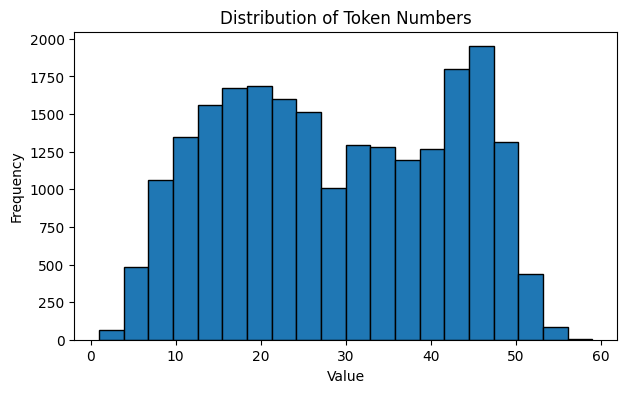

In [71]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [72]:
max_tokens = 48
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9427851904214898

### Fixing token counts of all documents (pad_sequences)

In [73]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

### Train Set Split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

### Modeling

In [94]:
gru_model = Sequential()
embedding_size = 100

gru_model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens))

gru_model.add(GRU(units=100, return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=25, return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=12, return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

In [95]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61060902, 2.76021341])

In [96]:
optimizer = Adam(learning_rate=0.0155)
gru_model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 48, 100)           2500000   
                                                                 
 gru_4 (GRU)                 (None, 48, 100)           60600     
                                                                 
 dropout_3 (Dropout)         (None, 48, 100)           0         
                                                                 
 gru_5 (GRU)                 (None, 48, 50)            22800     
                                                                 
 dropout_4 (Dropout)         (None, 48, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 48, 25)            5775      
                                                                 
 dropout_5 (Dropout)         (None, 48, 25)           

In [97]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 5, restore_best_weights=True)

gru_model.fit(X_train, y_train, epochs=20, batch_size=200,
         validation_split=0.1, callbacks=[early_stop], sample_weight=classes_weights)

Epoch 1/20
82/82 [==============================] - ETA: 0s - loss: 0.4829 - recall: 0.7639

82/82 [==============================] - 63s 590ms/step - loss: 0.4829 - recall: 0.7639 - val_loss: 0.4536 - val_recall: 0.6682
Epoch 2/20
82/82 [==============================] - ETA: 0s - loss: 0.3071 - recall: 0.8641

82/82 [==============================] - 77s 938ms/step - loss: 0.3071 - recall: 0.8641 - val_loss: 0.4400 - val_recall: 0.9017
Epoch 3/20
82/82 [==============================] - ETA: 0s - loss: 0.2366 - recall: 0.8990

82/82 [==============================] - 63s 766ms/step - loss: 0.2366 - recall: 0.8990 - val_loss: 0.4108 - val_recall: 0.8823
Epoch 4/20
82/82 [==============================] - ETA: 0s - loss: 0.2178 - recall: 0.9092

82/82 [==============================] - 51s 628ms/step - loss: 0.2178 - recall: 0.9092 - val_loss: 0.4535 - val_recall: 0.8756
Epoch 5/20
82/82 [==============================] - ETA: 0s - loss: 0.1893 - recall: 0.9254

82/82 [==============================] - 57s 696ms/step - loss: 0.1893 - recall: 0.9254 - val_loss: 0.5385 - val_recall: 0.8756
Epoch 6/20
82/82 [==============================] - ETA: 0s - loss: 0.1878 - recall: 0.9209

82/82 [==============================] - 46s 567ms/step - loss: 0.1878 - recall: 0.9209 - val_loss: 0.5147 - val_recall: 0.7886
Epoch 7/20
82/82 [==============================] - ETA: 0s - loss: 0.1995 - recall: 0.9085

Restoring model weights from the end of the best epoch: 2.
82/82 [==============================] - 46s 563ms/step - loss: 0.1995 - recall: 0.9085 - val_loss: 0.4913 - val_recall: 0.8187
Epoch 7: early stopping


### Model Evaluation

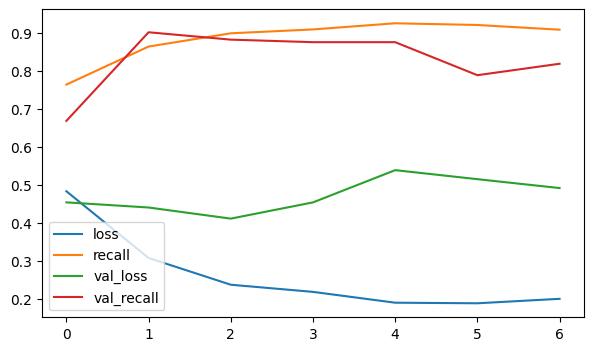

In [98]:
gru_model_loss = pd.DataFrame(gru_model.history.history)
gru_model_loss.plot();

In [99]:
gru_model_loss.head(5)

,loss,recall,val_loss,val_recall
0,0.482855,0.763876,0.453614,0.668227
1,0.307090,0.864086,0.440047,0.901672
2,0.236631,0.898965,0.410770,0.882274
3,0.217802,0.909166,0.453513,0.875585
4,0.189278,0.925368,0.538453,0.875585


In [100]:
y_pred = gru_model.predict(X_test)>=0.5

142/142 [==============================] - 8s 41ms/step


In [101]:
y_prediction =  [np.argmax(i) for i in y_pred]
y_prediction[:5]

[0, 0, 0, 0, 0]

In [102]:
print(confusion_matrix(y_test, y_prediction))
print("-------------------------------------------------------")
print(classification_report(y_test, y_prediction))


[[ 820    0]
 [3707    0]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.18      1.00      0.31       820
           1       0.00      0.00      0.00      3707

    accuracy                           0.18      4527
   macro avg       0.09      0.50      0.15      4527
weighted avg       0.03      0.18      0.06      4527



In [103]:
y_train_pred = gru_model.predict(X_train)>=0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))


566/566 [==============================] - 22s 39ms/step
[[ 2889   391]
 [  954 13873]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      3280
           1       0.97      0.94      0.95     14827

    accuracy                           0.93     18107
   macro avg       0.86      0.91      0.88     18107
weighted avg       0.93      0.93      0.93     18107



## BERT Modeling

### Read Data

### Train test split

### Tokenization

In [119]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

num_of_sent_tokens = []
for sent in x:

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  76


In [120]:
np.array(num_of_sent_tokens).mean()

33.735928249536094

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=101)

### Fixing token counts of all documents

In [123]:
def transformation(X):
  seq_len = 48

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

### Transformation Vectors to Matrices

In [124]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [127]:
labels_train = y_train.values.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [128]:
labels_test = y_test.values.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [129]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(48,), dtype=tf.int64, name=None), TensorSpec(shape=(48,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [130]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(48,), dtype=tf.int64, name=None), TensorSpec(shape=(48,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [116]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [131]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

### Batch Size

In [132]:
batch_size = 64

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


### Creating optimization

In [133]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.4 MB/s eta 0:00:00


In [136]:
from official.nlp import optimization

In [137]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

638
63


### Creating Model with TPU

In [158]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [140]:
epochs = 30
batch_size = 64
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [1]:
with strategy.scope():
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  optimizer = optimizer
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

NameError: ignored

In [148]:
pd.Series(y).value_counts(normalize=True)

1    0.818857
0    0.181143
Name: Recommended IND, dtype: float64

In [149]:
weights = {1:0.181143, 0:0.818857}

### Model Fiting

In [150]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=weights)

NameError: ignored

### Model evaluation

In [ ]:
y_pred = model3.predict(val_ds) >= 0.5
print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5
print(classification_report(y_train, y_train_pred))

In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___